<a href="https://colab.research.google.com/github/milkywayweaver/learn_pytorch/blob/main/course/PyT_C002_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PyTorch for Deep Learning & Machine Learning: Workflow** <br>
<br>
📖 Course: <br>
 PyTorch for Deep Learning & Machine Learning - freeCodeCamp.org, taught by Daniel Bourke. <br>
https://youtu.be/V_xro1bcAuA?si=luBE0ln8qKDfQWyM

In [ ]:
import torch
from torch import nn
print(torch.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.6.0+cu124


In [ ]:
outline = {1 : 'Getting the data ready',
           2 : 'Build a model',
           3 : 'Fit the model',
           4 : 'Making predictions and evaluating a model',
           5 : 'Saving and loading a model',
           6 : 'Putting it all together'}

# Plot Functions

In [ ]:
# def plot_prediction(X=X,X_test=X_test,X_train=X_train,y_train=y_train,y_test=y_test,y_preds=None):
def plot_prediction(X,X_train,X_test,y_train,y_test,y_preds=None):
  X = X.cpu()
  X_train = X_train.cpu()
  X_test = X_test.cpu()
  y_train = y_train.cpu()
  y_test = y_test.cpu()

  plt.figure(figsize=(4,3))
  plt.plot(X,weight*X+bias,label='Line',color='lightgrey',linewidth=0.8,zorder=0)
  plt.scatter(X_train,y_train,label='Train',marker='.',color='silver',zorder=2)
  plt.scatter(X_test,y_test,label='Test',marker='.',color='C0',zorder=3)
  if y_preds != None:
    plt.scatter(X_test,y_preds,label='Prediction',marker='.',color='C2',zorder=4)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def plot_loss_curve():
  plt.figure(figsize=(4,3))
  plt.plot(epoch_counts,losses,label='Loss')
  plt.plot(epoch_counts,test_losses,label='Test Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  # plt.axvline(35,color='lightgrey',zorder=0,linewidth=1)
  plt.title('Loss Curve')
  plt.legend()
  plt.show()

# Getting the data ready

Create the data

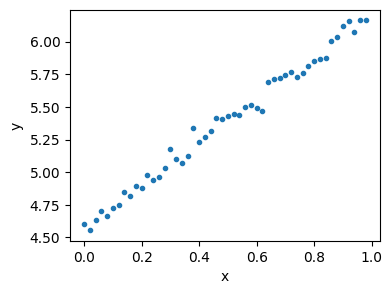

In [ ]:
np.random.seed(16)

# Create *known* parameters
weight = 1.6
bias = 4.6

# Create the tensors
X = torch.arange(0,1,0.02).unsqueeze(1)
y_noise = torch.tensor(np.random.normal(0,0.05,size=X.squeeze().shape[0])).unsqueeze(1)
y = weight*X + bias + y_noise

plt.figure(figsize=(4,3))
plt.scatter(X,y,marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Split training and testing data

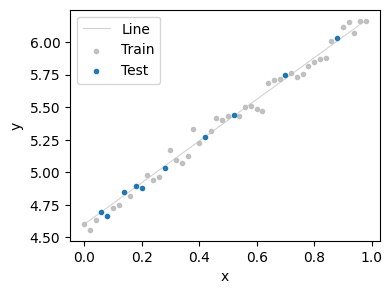

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=46)
plot_prediction(X,X_train,X_test,y_train,y_test)

# Build a model (using OOP :< )

📖 Gradient Descent : https://www.youtube.com/watch?v=IHZwWFHWa-w <br>
📖 Backpropagation : https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float32))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

**PyTorch Model Building Essentials**
1. torch.nn : all the essentials for neural networks
2. torch.nn.Parameter : parameters that the model try to learn
3. torch.nn.Modules : base class for all neural network modules
4. torch.optim : contains optimizers algorithms
5. def forward() - all nn.Module subclasses need you to overwrite forward()

**Checking the contents of a PyTorch model**

In [ ]:
torch.manual_seed(16)

# Create a model instance
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.3329], requires_grad=True),
 Parameter containing:
 tensor([1.0216], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([-0.3329])), ('bias', tensor([1.0216]))])

**Training the model**

1. Epoch loops
2. Forwards pass
3. Calculate loss
4. Zero Gradient Optimizer
5. Backpropagation
6. Optimize parameters

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer ---> Stochastic Gradient Descent (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Build a training loop
torch.manual_seed(16)
epochs = 100

epoch_counts = []
losses = []
test_losses = []

for epoch in range(epochs):
  # Sets all parameters that require gradients to require gradients
  model_0.train()
  # Forward pass
  y_pred = model_0(X_train)
  # Calculate loss function
  loss = loss_fn(y_pred,y_train)
  # Zero gradient optimizer - removes the previous interation's gradients
  optimizer.zero_grad()
  # Backpropagate
  loss.backward()
  # Optimize the parameter
  optimizer.step()

  model_0.eval() # Turns off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred,y_test)
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} \t| Loss: {loss} \t| Test Loss: {test_loss}')

    epoch_counts.append(epoch)
    losses.append(loss.detach().item())
    test_losses.append(test_loss.detach().item())


print(loss)

Epoch: 0 	| Loss: 4.589424558264186 	| Test Loss: 4.126805746179205
Epoch: 10 	| Loss: 3.3127483326019544 	| Test Loss: 2.9448095913940486
Epoch: 20 	| Loss: 2.0360732036651865 	| Test Loss: 1.762814509492498
Epoch: 30 	| Loss: 0.759398074728419 	| Test Loss: 0.5808194037490898
Epoch: 40 	| Loss: 0.04556413963434638 	| Test Loss: 0.026080135566386175
Epoch: 50 	| Loss: 0.04365094583197386 	| Test Loss: 0.025632309932408327
Epoch: 60 	| Loss: 0.04349667607760681 	| Test Loss: 0.020508054954203558
Epoch: 70 	| Loss: 0.04324527499975832 	| Test Loss: 0.027484869975743287
Epoch: 80 	| Loss: 0.04322926519217165 	| Test Loss: 0.028644633311924926
Epoch: 90 	| Loss: 0.04323207853140505 	| Test Loss: 0.028441500682530395
tensor(0.0432, dtype=torch.float64, grad_fn=<MeanBackward0>)


OrderedDict([('weight', tensor([1.6334])), ('bias', tensor([4.5666]))])

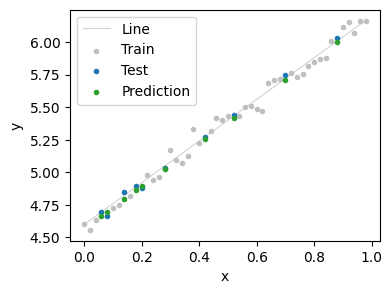

In [ ]:
display(model_0.state_dict())
y_preds = model_0(X_test).detach()

plot_prediction(X,X_train,X_test,y_train,y_test,y_preds=y_preds)

In [ ]:
len(epoch_counts),len(losses),len(test_losses)

(10, 10, 10)

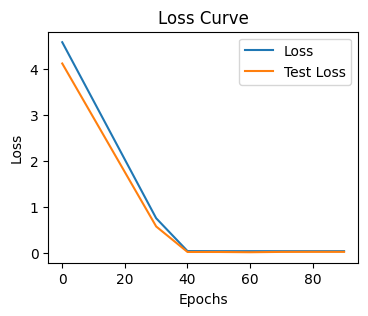

In [ ]:
plot_loss_curve()

# Saving a model <br>


💡 Three main methods for saving/loading a PyTorch model
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict() <br>

📖 Extra resource : https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
from pathlib import Path

# Create a folder and path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = 'PyT_C002_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)

models/PyT_C002_model_0.pth


In [ ]:
# Save the state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(model_0.state_dict(),MODEL_SAVE_PATH)
print(f'Successfully saved model to: {MODEL_SAVE_PATH}')

Saving model to: models/PyT_C002_model_0.pth
Successfully saved model to: models/PyT_C002_model_0.pth


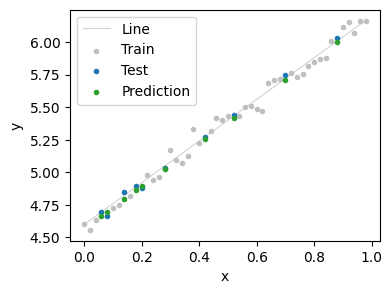

In [ ]:
# Loading back the model
# Initiate the model
model_0_loaded = LinearRegressionModel()

# The load loads only the state dict, NOT the entire model.
model_0_save_dict = torch.load(MODEL_SAVE_PATH)
model_0_loaded.load_state_dict(model_0_save_dict)

# Plot predictions
model_0_loaded.eval()
with torch.inference_mode():
  y_pred_loaded = model_0_loaded(X_test).detach()

plot_prediction(X,X_train,X_test,y_train,y_test,y_preds=y_pred_loaded)

In [ ]:
# Compare the created model and loaded model
y_preds == y_pred_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Practice

✅ Creating the data

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

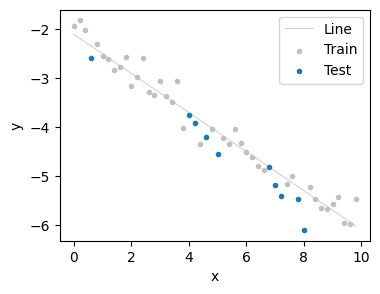

In [ ]:
np.random.seed(46)

# Target weight and bias
weight = -0.4
bias = -2.1

# Create the data
X = torch.arange(0,10,0.2,dtype=torch.float32).unsqueeze(1)
y_noise = torch.tensor(np.random.normal(0,0.3,size=X.squeeze().shape[0])).unsqueeze(1)
y = weight * X + bias + y_noise

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

# View the data
plot_prediction(X,X_train,X_test,y_train,y_test)

✅ Create the model

In [ ]:
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    # self.weight = nn.Parameter(torch.randn(1,dtype=torch.float32,requires_grad=True))
    # self.bias = nn.Parameter(torch.randn(1,dtype=torch.float32,requires_grad=True))
    self.linear_layer = nn.Linear(in_features=1,out_features=1,device=device)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    # return self.weight * x + self.bias
    return self.linear_layer(x)

✅ Create training function

In [ ]:
def train(model,epochs,lr,div,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
  X_train = X_train.to(device)
  X_test = X_test.to(device)
  y_train = y_train.to(device)
  y_test = y_test.to(device)

  # Setup loss function and optimizer
  loss_fn = nn.L1Loss()
  optimizer = torch.optim.SGD(params=model.parameters(),lr=lr)

  # Create tracking arrays
  epoch_counts = []
  losses = []
  test_losses = []

  # Train the model
  for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred,y_test)

    if epoch % div == 0:
      print(f'Epoch:{epoch} \t| Loss: {loss} \t| Test Loss: {test_loss}')

    epoch_counts.append(epoch)
    losses.append(loss.detach().item())
    test_losses.append(test_loss.detach().item())

  return epoch_counts,losses,test_losses

✅ Train the model

In [ ]:
torch.manual_seed(46)
model_1 = LinearRegressionModel2().to(device)

epoch_counts,losses,test_losses = train(model_1,1000,0.01,50)

Epoch:0 	| Loss: 2.873136113021717 	| Test Loss: 2.9261218194308216
Epoch:50 	| Loss: 1.2281709337683795 	| Test Loss: 0.8691623985700817
Epoch:100 	| Loss: 1.1254086551333244 	| Test Loss: 0.7980571925573559
Epoch:150 	| Loss: 1.0226461832488354 	| Test Loss: 0.7288547573698425
Epoch:200 	| Loss: 0.9198837299907979 	| Test Loss: 0.6653510836971664
Epoch:250 	| Loss: 0.817334283989149 	| Test Loss: 0.6245877711189651
Epoch:300 	| Loss: 0.7156930124501267 	| Test Loss: 0.6106728498282368
Epoch:350 	| Loss: 0.6180616162554167 	| Test Loss: 0.5505227910898315
Epoch:400 	| Loss: 0.5208080567256353 	| Test Loss: 0.5030207621477233
Epoch:450 	| Loss: 0.42868758990372835 	| Test Loss: 0.5167842451872761
Epoch:500 	| Loss: 0.3436897962197385 	| Test Loss: 0.457514602357381
Epoch:550 	| Loss: 0.27210153613573873 	| Test Loss: 0.40133851211690247
Epoch:600 	| Loss: 0.21535892459156508 	| Test Loss: 0.3693701092543537
Epoch:650 	| Loss: 0.1897415578952849 	| Test Loss: 0.3322545992754089
Epoch:70

✅ Make predictions

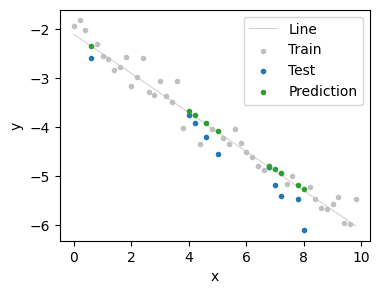

OrderedDict([('linear_layer.weight', tensor([[-0.3959]], device='cuda:0')),
             ('linear_layer.bias', tensor([-2.0920], device='cuda:0'))])

In [ ]:
y_preds = model_1(X_test.to(device)).detach()
plot_prediction(X,X_train,X_test,y_train,y_test,y_preds=y_preds.cpu())
display(model_1.state_dict())

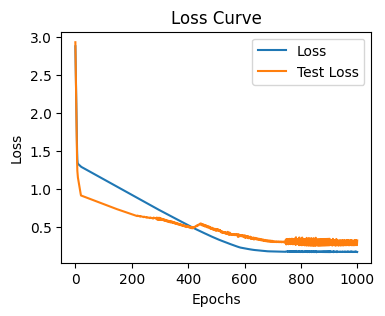

In [ ]:
plot_loss_curve()